In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [2]:
# Generate random dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the dataset (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
def build_model_without_batchnorm():
    model = Sequential()
    model.add(Dense(64, input_dim=20, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [4]:
def build_model_with_batchnorm():
    model = Sequential()
    model.add(Dense(64, input_dim=20, activation='relu'))
    model.add(BatchNormalization())  # Add Batch Normalization after the first Dense layer
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())  # Add Batch Normalization after the second Dense layer
    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())  # Add Batch Normalization after the third Dense layer
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [5]:
# Build models
model_without_batchnorm = build_model_without_batchnorm()
model_with_batchnorm = build_model_with_batchnorm()

# Train both models
history_without_batchnorm = model_without_batchnorm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
history_with_batchnorm = model_with_batchnorm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)


c:\Users\disha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


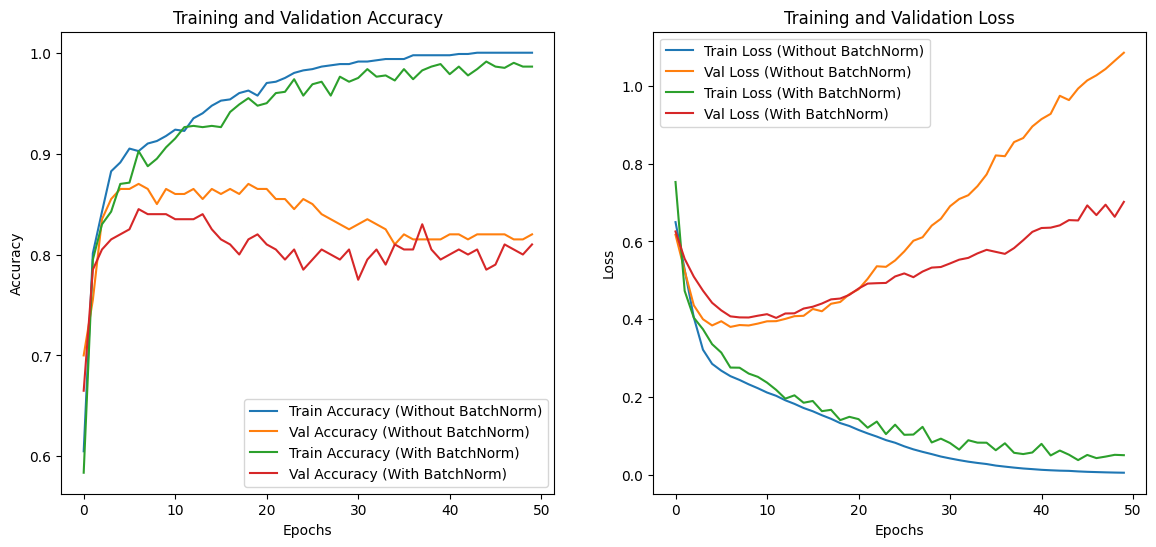

In [6]:
# Plot accuracy curves
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_without_batchnorm.history['accuracy'], label='Train Accuracy (Without BatchNorm)')
plt.plot(history_without_batchnorm.history['val_accuracy'], label='Val Accuracy (Without BatchNorm)')
plt.plot(history_with_batchnorm.history['accuracy'], label='Train Accuracy (With BatchNorm)')
plt.plot(history_with_batchnorm.history['val_accuracy'], label='Val Accuracy (With BatchNorm)')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss curves
plt.subplot(1, 2, 2)
plt.plot(history_without_batchnorm.history['loss'], label='Train Loss (Without BatchNorm)')
plt.plot(history_without_batchnorm.history['val_loss'], label='Val Loss (Without BatchNorm)')
plt.plot(history_with_batchnorm.history['loss'], label='Train Loss (With BatchNorm)')
plt.plot(history_with_batchnorm.history['val_loss'], label='Val Loss (With BatchNorm)')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
